In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast


#Part A

**Execution Command**: ccc create spark parta.py -d -s 

**Output  file**:  

*   Avgtxn.csv 
*   numtxn.csv




We are doing an analysis on Ethereum transactions data. It reads a CSV file of transaction data from an S3 bucket and processes the data using PySpark. We are calculating two metrics: the number of transactions per month and the average value of transactions per month.

We are extracting the month and year from the transaction timestamp, and to convert the transaction value to an integer and performing analysis to get the average transactions and the number of transactions.

In [82]:
avgtxn = pd.read_csv('./Avgtxn.csv')
avgtxn.head(10)

,year,month,avg(value)
0,2015,8,1.503739e+06
1,2015,9,6.048341e+05
2,2015,10,1.535352e+05
3,2015,11,7.767781e+04
4,2015,12,4.604671e+04
5,2016,1,4.801871e+04
6,2016,2,1.253940e+05
7,2016,3,1.845057e+05
8,2016,4,1.663276e+05
9,2016,5,1.876370e+05


In [83]:
df = avgtxn
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(day=1))

# drop year and month columns
df = df.drop(['year', 'month'], axis=1)
df

,avg(value),Date
0,1.503739e+06,2015-08-01
1,6.048341e+05,2015-09-01
2,1.535352e+05,2015-10-01
3,7.767781e+04,2015-11-01
4,4.604671e+04,2015-12-01
5,4.801871e+04,2016-01-01
6,1.253940e+05,2016-02-01
7,1.845057e+05,2016-03-01
8,1.663276e+05,2016-04-01
9,1.876370e+05,2016-05-01


The graph displays the average transactions that took place each month during the entire duration of the dataset


<BarContainer object of 42 artists>

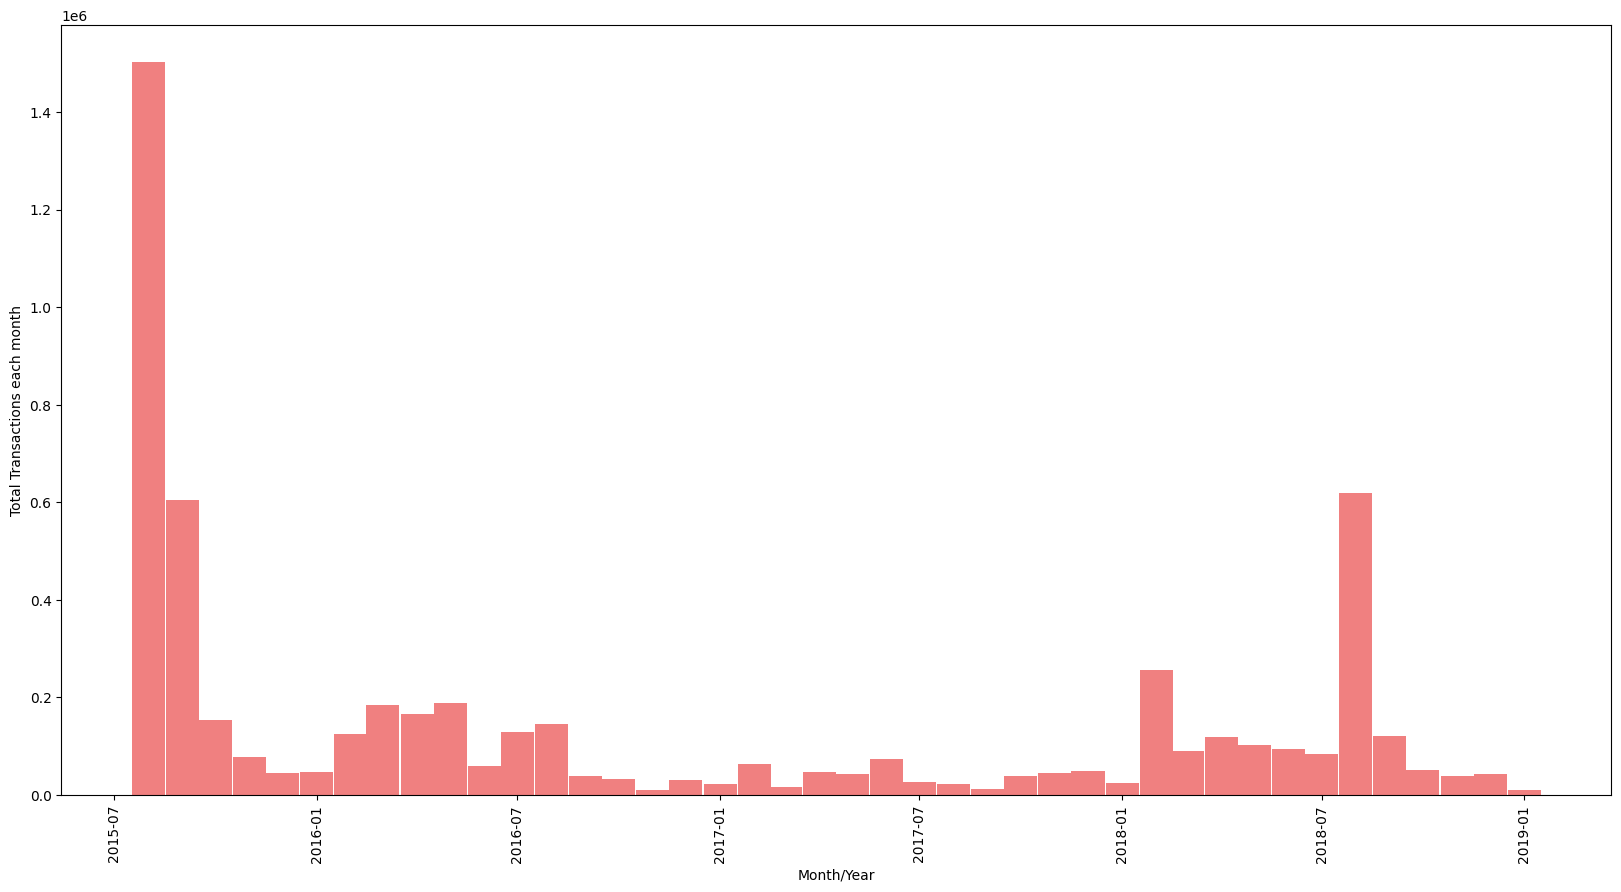

In [84]:
print('The graph displays the average transactions that took place each month during the entire duration of the dataset')
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.xlabel('Month/Year')
plt.ylabel('Total Transactions each month')
x=df['Date']
y=df['avg(value)']
plt.bar(x,y,color='lightcoral', width=30)

In [85]:
numtxn = pd.read_csv('./numtxn.csv')
numtxn.head(10)

,year,month,count
0,2015,8,85609
1,2015,9,173805
2,2015,10,205045
3,2015,11,234733
4,2015,12,347092
5,2016,1,404816
6,2016,2,520040
7,2016,3,917170
8,2016,4,1023096
9,2016,5,1346796


In [86]:
df1 = numtxn
df1['Date'] = pd.to_datetime(df1[['year', 'month']].assign(day=1))

# drop year and month columns
df1 = df1.drop(['year', 'month'], axis=1)

df1.head(5)

,count,Date
0,85609,2015-08-01
1,173805,2015-09-01
2,205045,2015-10-01
3,234733,2015-11-01
4,347092,2015-12-01


The graph displays the count of transactions that took place each month during the entire duration of the dataset


<BarContainer object of 42 artists>

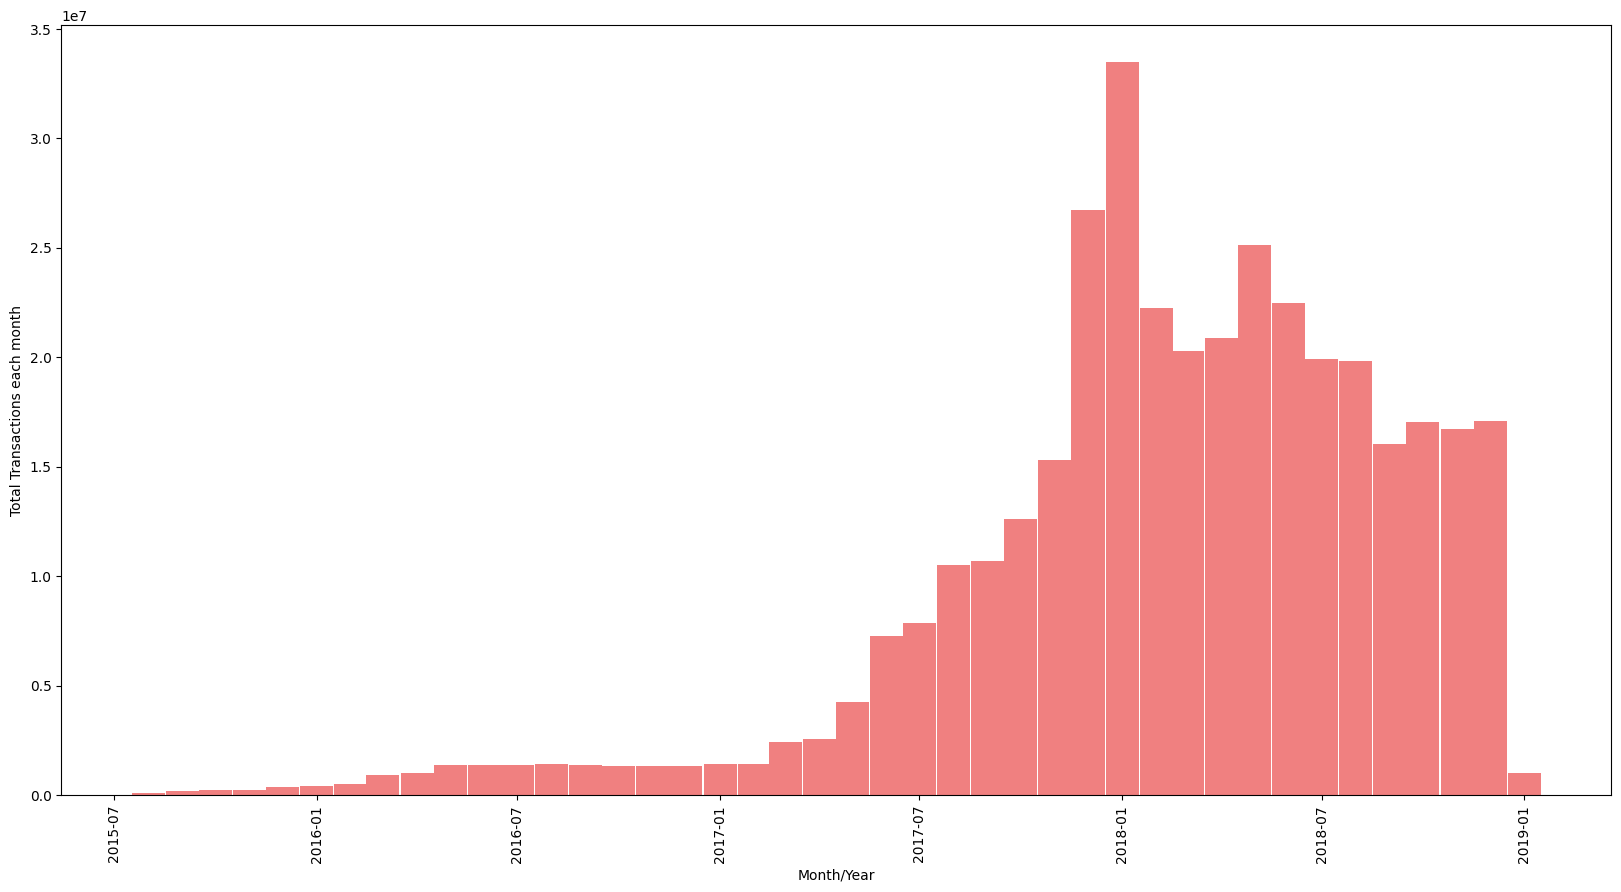

In [87]:
print('The graph displays the count of transactions that took place each month during the entire duration of the dataset')
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.xlabel('Month/Year')
plt.ylabel('Total Transactions each month')
x=df1['Date']
y=df1['count']
plt.bar(x,y,color='lightcoral', width=30)

#Part B

**Execution Command**: ccc create spark partb.py -d -s 

**Output  file**:  

*   top10_smart_contractors.txt 

We are reading Ethereum transaction and contract data from CSV files stored in an S3 bucket, processing the data using Apache Spark to identify the top 10 smart contracts by total transaction value, and then writing the results to a new file in the same S3 bucket.

In [88]:
# read the text file and split each line into a list of two elements
with open('./top10_smart_contractors.txt', 'r') as file:
    data = [line.strip().split(',')[:2] for line in file.readlines()]

# create a pandas DataFrame with two columns
df_partC = pd.DataFrame(data, columns=['HashID', 'Value'])
df_partC['HashID'] = df_partC['HashID'].str.strip('[["').str.strip('"]]')
df_partC['Value'] = df_partC['Value'].str.replace('[\[\]\(\)]', '')
df_partC.head(10)

<ipython-input-88-858e37cd7d73>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_partC['Value'] = df_partC['Value'].str.replace('[\[\]\(\)]', '')


,HashID,Value
0,0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444,84155363699941767867374641
1,0x7727e5113d1d161373623e5f49fd568b4f543a9e,45627128512915344587749920
2,0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,42552989136413198919298969
3,0xbfc39b6f805a9e40e77291aff27aee3c96915bdd,21104195138093660050000000
4,0xe94b04a0fed112f3664e45adb2b8915693dd5ff3,15543077635263742254719409
5,0xabbb6bebfa05aa13e908eaa492bd7a8343760477,10719485945628946136524680
6,0x341e790174e3a4d35b65fdc067b6b5634a61caea,8379000751917755624057500
7,0x58ae42a38d6b33a1e31492b60465fa80da595755,2902709187105736532863818
8,0xc7c7f6660102e9a1fee1390df5c76ea5a5572ed3,1238086114520042000000000
9,0xe28e72fcf78647adce1f1252f240bbfaebd63bcc,1172426432515823142714582


#Part C

**Execution Command**: ccc create spark partc.py -d -s 

**Output  file**:  

*   top 10 minors

We are processing Ethereum blockchain data stored in an S3 bucket and finding the top 10 Ethereum miners based on the total size of blocks mined by each miner. The results are then written to a text file in another S3 bucket.

In [144]:
with open("top10_minors.txt", "r") as file:
    data = file.read().splitlines()
for i in range(len(data)):
    data[i] = data[i].replace('{\\"address\\":\\"', 'Address:')
    data[i] = data[i].replace('\\"', '')
    data[i] = data[i].replace('value:', 'Value:')
    data[i] = data[i].replace('}', '')
    data[i] = data[i].replace('"', '')
    data[i] = data[i].replace('[', '')
    data[i] = data[i].replace(']', '')
data


['Address:0xaa1a6e3e6ef20068f7f8d8c835d2d22fd5116444,Value:84155363699941767867374641, Address:0x7727e5113d1d161373623e5f49fd568b4f543a9e,Value:45627128512915344587749920, Address:0x209c4784ab1e8183cf58ca33cb740efbf3fc18ef,Value:42552989136413198919298969, Address:0xfa52274dd61e1643d2205169732f29114bc240b3,Value:40546128459947291326220872, Address:0x6fc82a5fe25a5cdb58bc74600a40a69c065263f8,Value:24543161734499779571163970, Address:0xbfc39b6f805a9e40e77291aff27aee3c96915bdd,Value:21104195138093660050000000, Address:0xe94b04a0fed112f3664e45adb2b8915693dd5ff3,Value:15543077635263742254719409, Address:0xbb9bc244d798123fde783fcc1c72d3bb8c189413,Value:11983608729102893846818681, Address:0xabbb6bebfa05aa13e908eaa492bd7a8343760477,Value:10719485945628946136524680, Address:0x341e790174e3a4d35b65fdc067b6b5634a61caea,Value:8379000751917755624057500']

#Part D : Gas Guzzler

**Execution Command**: ccc create spark gas_guzzler.py -d -s 

**Output  file**:  

*   avg_gasprice.txt : df_partD1 : how gas price has changed over time.
*   avg_gasused.txt : df_partD2 : how gas price has been used over time. 

In [90]:
# read the text file and split each line into a list of two elements
with open('./avg_gasprice.txt', 'r') as file:
  data = [line.strip().split(',')[:2] for line in file.readlines()]

# create a pandas DataFrame with two columns
df_partD1 = pd.DataFrame(data, columns=['Date', 'Value'])
df_partD1['Date'] = df_partD1['Date'].str.strip('[["').str.strip('"]]')
df_partD1['Value'] = df_partD1['Value'].str.replace('[\[\]\(\)]', '')
df_partD1['Value'] = df_partD1['Value'].str.replace('"', '')
df_partD1['Value'] = df_partD1['Value'].astype(float)
df_partD1['Date'] = pd.to_datetime(df_partD1['Date'])

# Sort values by date
df_partD1 = df_partD1.sort_values('Date')

df_partD1.head(10)

<ipython-input-90-3b0921f2e712>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_partD1['Value'] = df_partD1['Value'].str.replace('[\[\]\(\)]', '')


,Date,Value
0,2016-01-01,5.659627e+10
4,2016-02-01,6.918068e+10
7,2016-03-01,3.279704e+10
10,2016-04-01,2.336118e+10
13,2016-05-01,2.374628e+10
16,2016-06-01,2.302125e+10
19,2016-07-01,2.262954e+10
1,2017-01-01,2.250757e+10
5,2017-02-01,2.304723e+10
8,2017-03-01,2.323225e+10


<BarContainer object of 21 artists>

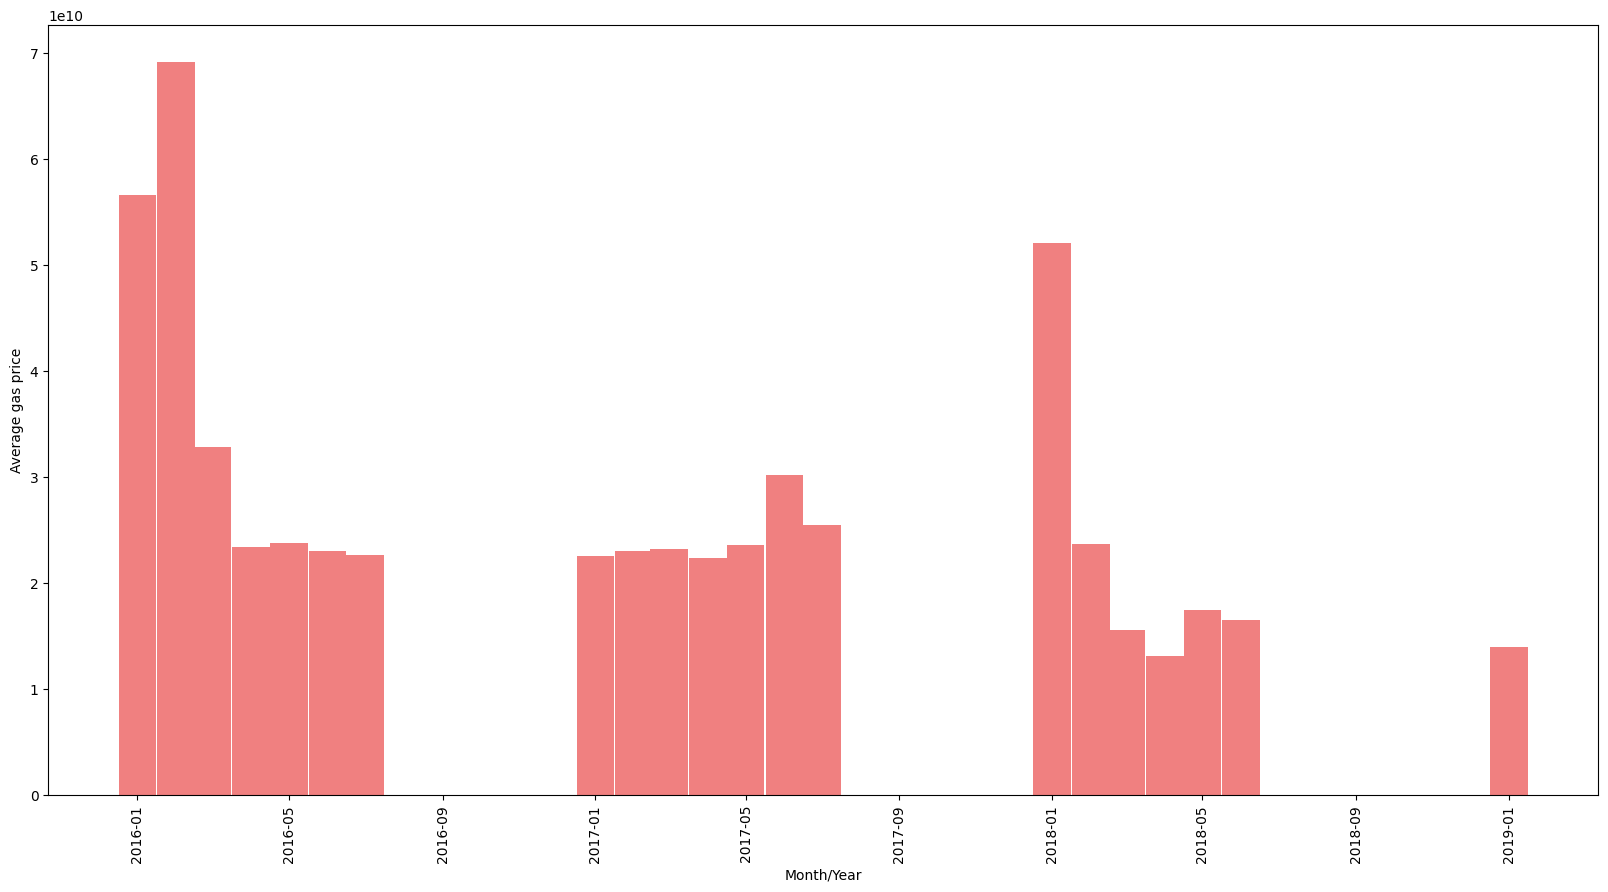

In [91]:
df1 = df_partD1
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.xlabel('Month/Year')
plt.ylabel('Average gas price')
x=df1['Date']
y=df1['Value']
plt.bar(x,y,color='lightcoral', width=30)

In [92]:
# read the text file and split each line into a list of two elements
with open('./avg_gasused.txt', 'r') as file:
    data = [line.strip().split(',')[:2] for line in file.readlines()]

# create a pandas DataFrame with two columns
df_partD2 = pd.DataFrame(data, columns=['Date', 'Value'])
df_partD2['Date'] = df_partD2['Date'].str.strip('[["').str.strip('"]]')
df_partD2['Value'] = df_partD2['Value'].str.replace('[\[\]\(\)]', '')
df_partD2['Value'] = df_partD2['Value'].str.replace('"', '')
df_partD2['Value'] = df_partD2['Value'].astype(float)
df_partD2['Date'] = pd.to_datetime(df_partD2['Date'])

# Sort values by date
df_partD2 = df_partD2.sort_values('Date')
df_partD2.head(10)

<ipython-input-92-642dc145f6e5>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  df_partD2['Value'] = df_partD2['Value'].str.replace('[\[\]\(\)]', '')


,Date,Value
10,2015-08-01,3.647744e+05
32,2015-09-01,6.074794e+05
11,2015-10-01,1.064342e+06
3,2015-11-01,5.526641e+05
40,2015-12-01,4.459484e+05
21,2016-01-01,3.586068e+05
35,2016-02-01,3.045242e+05
25,2016-03-01,2.338062e+05
22,2016-04-01,4.233925e+05
36,2016-05-01,7.227421e+05


<BarContainer object of 42 artists>

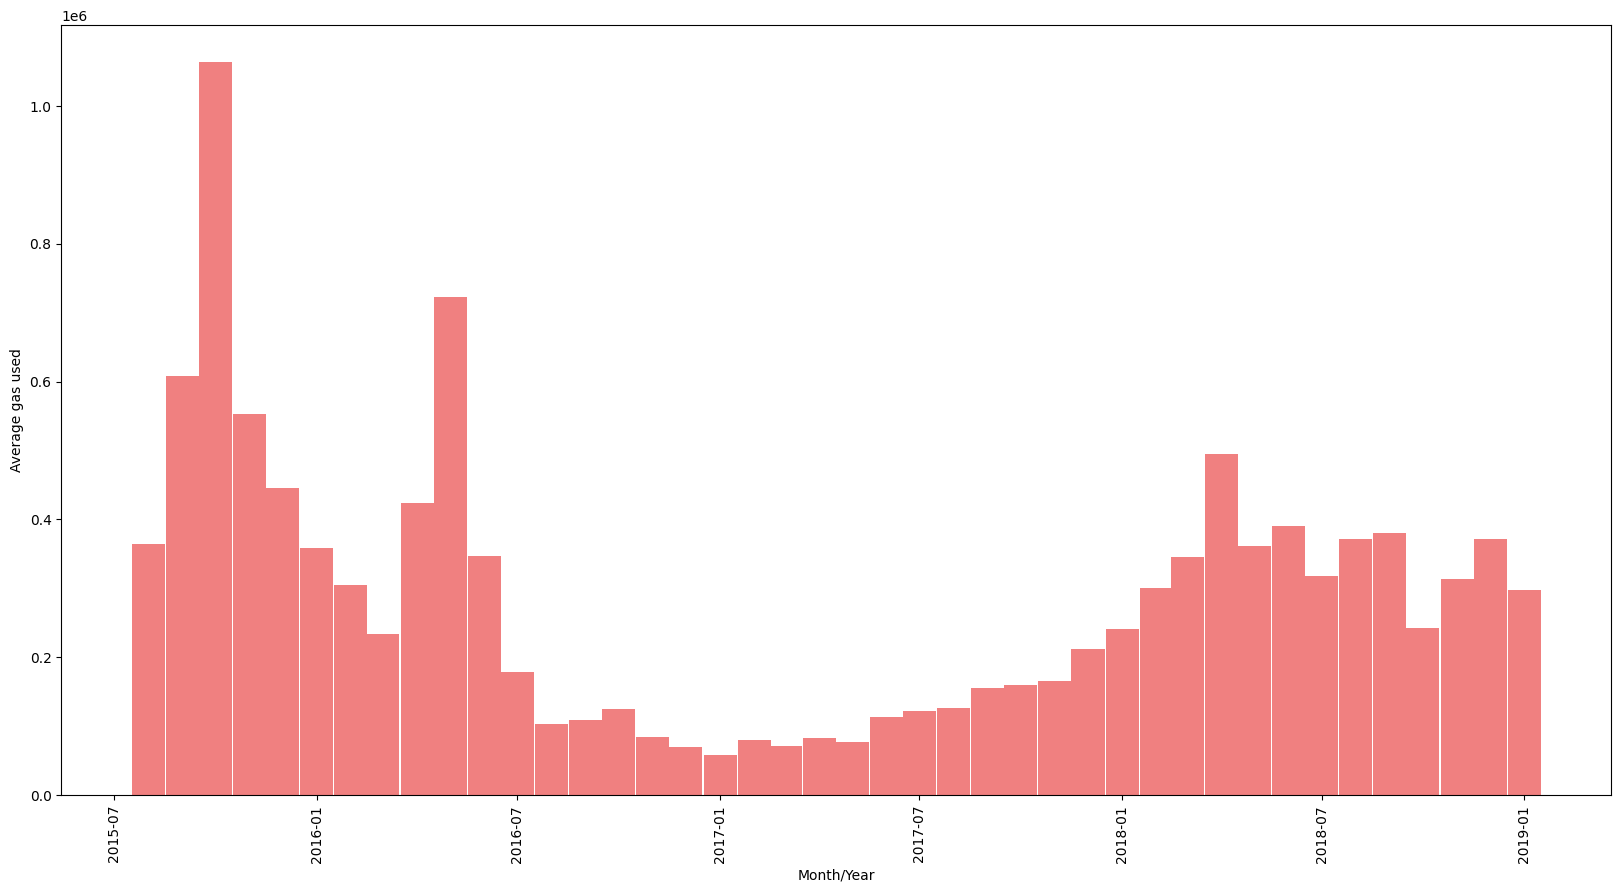

In [93]:
df1 = df_partD2
plt.figure(figsize = (20,10))
plt.xticks(rotation=90)
plt.xlabel('Month/Year')
plt.ylabel('Average gas used')
x=df1['Date']
y=df1['Value']
plt.bar(x,y,color='lightcoral', width=30)

#Part D : Wash Trading

**Execution Command**: ccc create spark wash_trading.py -d -s 

**Output  file**:  

*   top 10 washtrade

Using a map-reduce operation to calculate the total value of transactions for each pair of addresses and generating top 10 as a result.

In [94]:
# Read the txt file and convert its contents to a list of lists
with open('top10_washtrade.txt', 'r') as f:
    data_str = f.read().replace('\n', '')
    data_list = ast.literal_eval(data_str)

# Create a new list to hold the formatted data
formatted_data = []

# Loop through the data list and format each item as a list with 3 columns
for item in data_list:
    formatted_item = [item[0][0], item[0][1], item[1]]
    formatted_data.append(formatted_item)

# Print the formatted data
print(formatted_data)

[['0x02459d2ea9a008342d8685dae79d213f14a87d43', '0x02459d2ea9a008342d8685dae79d213f14a87d43', 1.954853133249319e+25], ['0x32362fbfff69b9d31f3aae04faa56f0edee94b1d', '0x32362fbfff69b9d31f3aae04faa56f0edee94b1d', 5.295490520134209e+24], ['0x0c5437b0b6906321cca17af681d59baf60afe7d6', '0x0c5437b0b6906321cca17af681d59baf60afe7d6', 2.3771525723546656e+24], ['0xdb6fd484cfa46eeeb73c71edee823e4812f9e2e1', '0xdb6fd484cfa46eeeb73c71edee823e4812f9e2e1', 4.1549736829070815e+23], ['0xd24400ae8bfebb18ca49be86258a3c749cf46853', '0xd24400ae8bfebb18ca49be86258a3c749cf46853', 2.2700012958e+23], ['0x5b76fbe76325b970dbfac763d5224ef999af9e86', '0x5b76fbe76325b970dbfac763d5224ef999af9e86', 7.873327492788825e+22], ['0xdd3e4522bdd3ec68bc5ff272bf2c64b9957d9563', '0xdd3e4522bdd3ec68bc5ff272bf2c64b9957d9563', 5.790175685075667e+22], ['0x005864ea59b094db9ed88c05ffba3d3a3410592b', '0x005864ea59b094db9ed88c05ffba3d3a3410592b', 3.7199e+22], ['0x4739928c37159f55689981b10524a62397a65d77', '0x4739928c37159f55689981b1052

In [95]:
df_partD = pd.DataFrame(formatted_data, columns=['HashID','ID','Value'])
df_partD = df_partD.drop(['ID'], axis=1)
df_partD

,HashID,Value
0,0x02459d2ea9a008342d8685dae79d213f14a87d43,1.954853e+25
1,0x32362fbfff69b9d31f3aae04faa56f0edee94b1d,5.295491e+24
2,0x0c5437b0b6906321cca17af681d59baf60afe7d6,2.377153e+24
3,0xdb6fd484cfa46eeeb73c71edee823e4812f9e2e1,4.154974e+23
4,0xd24400ae8bfebb18ca49be86258a3c749cf46853,2.270001e+23
5,0x5b76fbe76325b970dbfac763d5224ef999af9e86,7.873327e+22
6,0xdd3e4522bdd3ec68bc5ff272bf2c64b9957d9563,5.790176e+22
7,0x005864ea59b094db9ed88c05ffba3d3a3410592b,3.719900e+22
8,0x4739928c37159f55689981b10524a62397a65d77,3.023900e+22
9,0xb8326d2827b4cf33247c4512b72382f4c1190710,2.457200e+22


#Part D : Data Overhead

**Execution Command**: ccc create spark overhead_misc.py -d -s 

**Output  file**:  

*   overhead.txt

Data Overhead: The blocks table contains a lot of information that may not strictly be necessary for a functioning cryptocurrency e.g. logs_bloom, sha3_uncles, transactions_root, state_root, receipts_root. Analyse how much space would be saved if these columns were removed.

In [96]:
# read the text file and split each line into a list of two elements
with open('./overhead.txt', 'r') as file:
    data = [line.strip().split(',')[:2] for line in file.readlines()]

# create a pandas DataFrame with two columns
df_partD3 = pd.DataFrame(data, columns=['column_name', 'size'])
df_partD3 = df_partD3.drop(df_partD3.index[0])
df_partD3['size'] = df_partD3['size'].astype(float)
df_partD3.head(10)

,column_name,size
1,logs_bloom,1.792000e+09
2,sha3_uncles,2.240000e+08
3,transactions_root,2.240000e+08
4,state_root,2.240000e+08
5,receipts_root,2.240000e+08


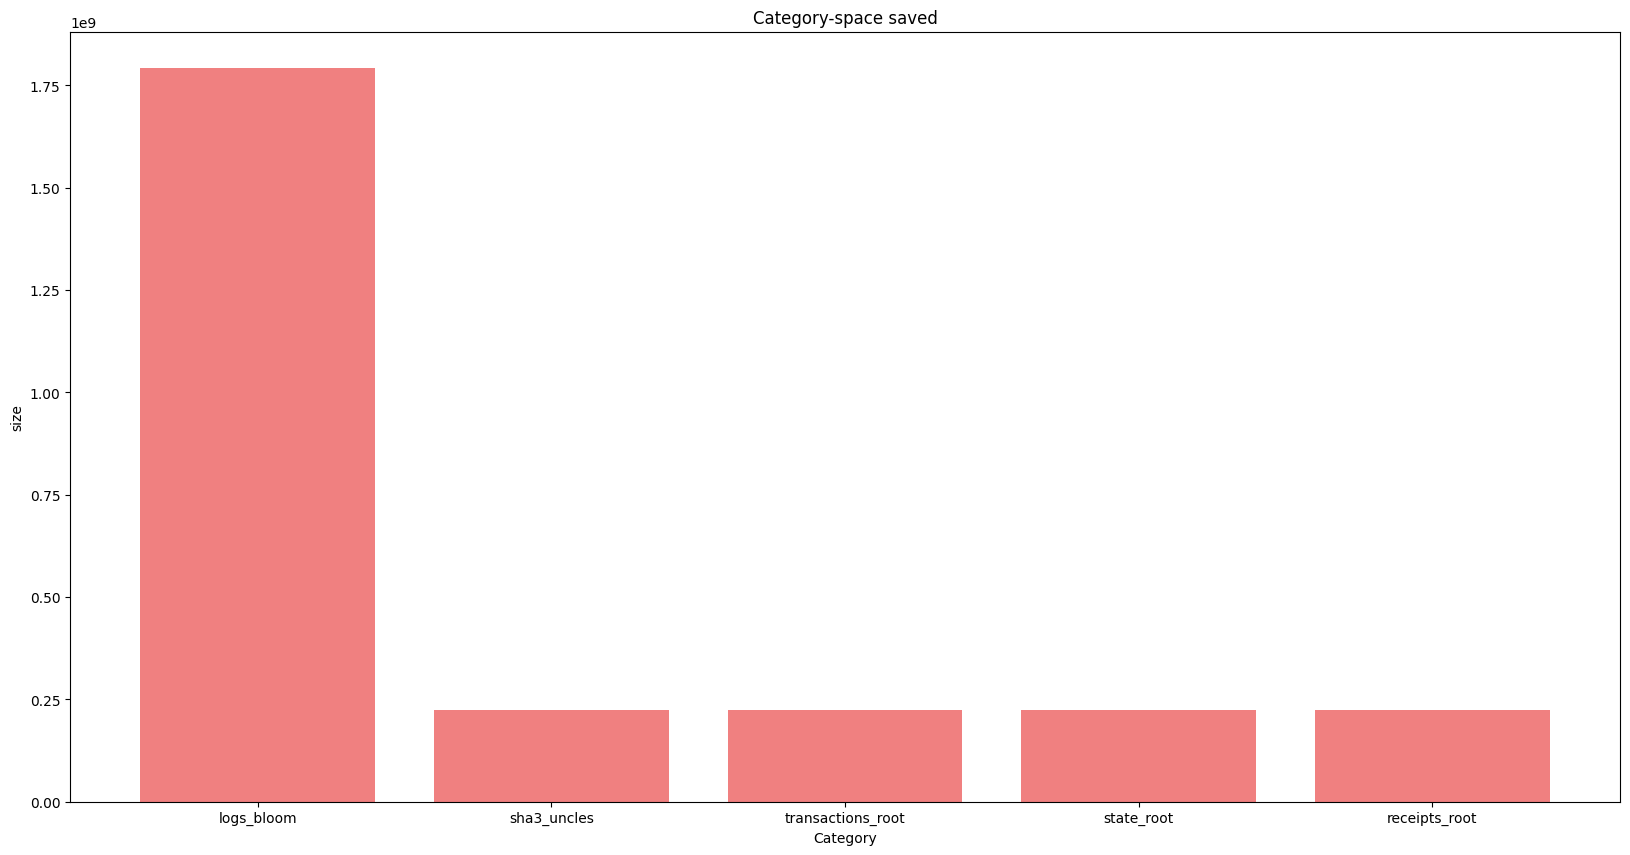

In [97]:
# plot the bar chart
plt.figure(figsize = (20,10))
plt.bar(df_partD3.column_name, df_partD3['size'],color='lightcoral')
plt.xlabel('Category')
plt.ylabel('size')
plt.title('Category-space saved')
plt.show()

#Part D : Scam Analysis

**Execution Command**: ccc create spark scam_analysis.py -d -s 

**Output  file**:  

*   most lucrative scams

In [98]:
# Read the txt file and convert its contents to a list of lists
with open('most_lucrative_scams (1).txt', 'r') as f:
    data_str = f.read().replace('\n', '')
    data_list = ast.literal_eval(data_str)

# Create a new list to hold the formatted data
formatted_data = []

# Loop through the data list and format each item as a list with 3 columns
for item in data_list:
    formatted_item = [item[0][0], item[0][1], item[1]]
    formatted_data.append(formatted_item)

# Print the formatted data
print(formatted_data)

[['5622', 'Scamming', 1.6709083588072848e+22], ['2135', 'Phishing', 6.583972305381559e+21], ['90', 'Phishing', 5.97258962910242e+21], ['2258', 'Phishing', 3.4628075247037406e+21], ['2137', 'Phishing', 3.3899142425371843e+21], ['2132', 'Scamming', 2.428074787748573e+21], ['88', 'Phishing', 2.0677508920135265e+21], ['2358', 'Scamming', 1.835176671481489e+21], ['2556', 'Phishing', 1.8030465742641819e+21], ['1200', 'Phishing', 1.6305774191330895e+21], ['2181', 'Phishing', 1.1639041282770014e+21], ['41', 'Fake ICO', 1.1513030257909173e+21], ['5820', 'Scamming', 1.1339734671862094e+21], ['86', 'Phishing', 8.944561496957759e+20], ['2193', 'Phishing', 8.82710017471721e+20]]


In [99]:
df_partD = pd.DataFrame(formatted_data, columns=['HashID','category','Value'])
df_partD

,HashID,category,Value
0,5622,Scamming,1.670908e+22
1,2135,Phishing,6.583972e+21
2,90,Phishing,5.972590e+21
3,2258,Phishing,3.462808e+21
4,2137,Phishing,3.389914e+21
5,2132,Scamming,2.428075e+21
6,88,Phishing,2.067751e+21
7,2358,Scamming,1.835177e+21
8,2556,Phishing,1.803047e+21
9,1200,Phishing,1.630577e+21


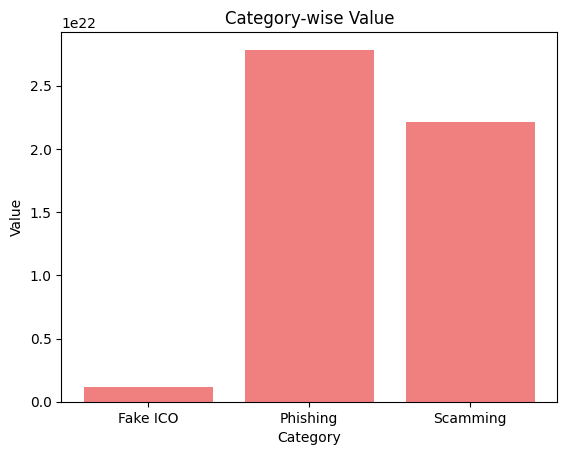

In [100]:
df_grouped = df_partD.groupby('category').sum()

# plot the bar chart
plt.bar(df_grouped.index, df_grouped['Value'],color='lightcoral')
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Category-wise Value')
plt.show()

In [101]:
# Read the txt file and convert its contents to a list of lists
with open('ether_vs_time (1).txt', 'r') as f:
    data_str = f.read().replace('\n', '')


# Create a new list to hold the formatted data
formatted_data = []

# Loop through the data list and format each item as a list with 3 columns
for item in data_list:
    formatted_item = [item[0][0], item[0][1], item[1]]
    formatted_data.append(formatted_item)

# Print the formatted data
print(formatted_data)

[['5622', 'Scamming', 1.6709083588072848e+22], ['2135', 'Phishing', 6.583972305381559e+21], ['90', 'Phishing', 5.97258962910242e+21], ['2258', 'Phishing', 3.4628075247037406e+21], ['2137', 'Phishing', 3.3899142425371843e+21], ['2132', 'Scamming', 2.428074787748573e+21], ['88', 'Phishing', 2.0677508920135265e+21], ['2358', 'Scamming', 1.835176671481489e+21], ['2556', 'Phishing', 1.8030465742641819e+21], ['1200', 'Phishing', 1.6305774191330895e+21], ['2181', 'Phishing', 1.1639041282770014e+21], ['41', 'Fake ICO', 1.1513030257909173e+21], ['5820', 'Scamming', 1.1339734671862094e+21], ['86', 'Phishing', 8.944561496957759e+20], ['2193', 'Phishing', 8.82710017471721e+20]]


In [102]:
df_partD = pd.DataFrame(formatted_data, columns=['Hash_ID', 'Column 2', 'value'])
df_partD

,Hash_ID,Column 2,value
0,5622,Scamming,1.670908e+22
1,2135,Phishing,6.583972e+21
2,90,Phishing,5.972590e+21
3,2258,Phishing,3.462808e+21
4,2137,Phishing,3.389914e+21
5,2132,Scamming,2.428075e+21
6,88,Phishing,2.067751e+21
7,2358,Scamming,1.835177e+21
8,2556,Phishing,1.803047e+21
9,1200,Phishing,1.630577e+21
